# Guión 2
Antonio Ruiz Molero

In [5]:
import pandas as pd
import numpy as np
white = pd.read_csv("winequality-white.csv", sep = ";")

red = pd.read_csv("winequality-red.csv", sep = ";")

red['type'] = 1

white['type'] = 0

wines = red.append(white, ignore_index = True)

In [2]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [3]:
X = wines.iloc[:, 0:12]

In [4]:
Y = np.ravel(wines.quality)

In [5]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X)

In [6]:
X_train

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [6]:
from keras import Sequential

from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import r2_score



Definimos una función que nos ayude a automatizar el proceso de creación de modelos, al igual que en la práctica anterior. Como parámetros de entrada, podemos definir el numero de capas ocultas y las neuronas por capa. Además del número de particiones, épocas, el optimizador y la métrica que usa durante el aprendizaje.

In [7]:
def regression_model(units_per_layer, input_s,  n_splits_, epochs_, verbose_=1, seed_=1, optimizer_ = 'rmsprop', metrics_ = [ 'mae'], activation_ = 'relu' ):
    seed = seed_
    np.random.seed(seed)

    kfold = StratifiedKFold(n_splits=n_splits_, shuffle=True, random_state=seed)

    for train, test in kfold.split(X, Y):
        model = Sequential()
        depth = len(units_per_layer)
        model.add(Dense(units_per_layer[0], activation=activation_, input_shape=(input_s,)))
        if (depth!=0):
            for i in range(1, depth):
                model.add(Dense(units_per_layer[i], activation=activation_))
        model.add(Dense(1))
        
        model.compile(optimizer=optimizer_, loss='mse', metrics=metrics_)
        model.fit(X_train[train], Y[train], epochs=epochs_, verbose=verbose_)
        y_pred=model.predict(X_train[test])

    mse_value, mae_value = model.evaluate(X_train[test], Y[test], verbose=verbose_)
    r2score = r2_score(Y[test], y_pred)
    return mse_value, mae_value, r2score
    

In [21]:
regression_model([62], 12, 5, 10, verbose_=0, seed_=1, optimizer_='rmsprop', metrics_=['mae'], activation_='relu' )

(0.008574560284614563, 0.0696149617433548, 0.9887701004304583)

## Resultados iniciales
Usando la configuración de 1 capa oculta con 62 neuronas, vemos la variación de los resultados al usar distintas épocas con las métricas mse, mae y R2.

In [24]:
epochs = [10, 20, 30, 40, 50]
metricas = []
for i_epochs in epochs:
    metricas.append(regression_model([62], 12, 5, i_epochs, verbose_=0, seed_=1, optimizer_='rmsprop', metrics_=['mae'], activation_='relu' ))

In [25]:
metricas

[(0.013785162940621376, 0.09119463711977005, 0.9819458944296605),
 (0.0031737484969198704, 0.042470671236515045, 0.9958434127049484),
 (0.0023599134292453527, 0.03551211208105087, 0.996909276122736),
 (0.0021134091075509787, 0.03185389190912247, 0.9972321161603671),
 (0.00415986031293869, 0.05721772089600563, 0.994551927900059)]

In [27]:
df_metricas = pd.DataFrame(metricas, columns=['mse', 'mae', 'R2'], index=['10 epochs', '20 epochs', '30 epochs', '40 epochs', '50 epochs'])
print(df_metricas)

                mse       mae        R2
10 epochs  0.013785  0.091195  0.981946
20 epochs  0.003174  0.042471  0.995843
30 epochs  0.002360  0.035512  0.996909
40 epochs  0.002113  0.031854  0.997232
50 epochs  0.004160  0.057218  0.994552


El número de iteraciones que mejores resultados obtienen son 40 épocas. El valor de mse y mae decae hasta un mínimo en las pruebas que hemos realizado y R2 obtiene un valor muy cercano a 1. Parece que obtenemos un mínimo ya que a valores menores y mayores de épocas, los resultados empeoran.

## Ajuste fino de la regresión

### Agregar más capas
Definimos varios modelos en los cuales aumentamos el número de capas

In [31]:
metricas = []
modelos = [[62], [62, 62], [62, 62, 62], [62, 62, 62, 62], [62, 62, 62, 62, 62]]
for i_modelos in modelos:
    metricas.append(regression_model(i_modelos, 12, 5, 40, verbose_=0, seed_=1, optimizer_='rmsprop', metrics_=['mae'], activation_='relu' ))

In [32]:
metricas

[(0.0011985173914581537, 0.026208890601992607, 0.9984303253984265),
 (0.002360659884288907, 0.03976006060838699, 0.9969082992724735),
 (0.011676796711981297, 0.09639350324869156, 0.984707167042099),
 (0.0015980659518390894, 0.033231861889362335, 0.9979070536381559),
 (0.008068920113146305, 0.08572115749120712, 0.989432321445366)]

In [33]:
df_metricas = pd.DataFrame(metricas, columns=['mse', 'mae', 'R2'], index=['1 capa oculta', '2 capas ocultas', '3 capas ocultas', '4 capas ocultas', '5 capas ocultas'])
print(df_metricas)

                      mse       mae        R2
1 capa oculta    0.001199  0.026209  0.998430
2 capas ocultas  0.002361  0.039760  0.996908
3 capas ocultas  0.011677  0.096394  0.984707
4 capas ocultas  0.001598  0.033232  0.997907
5 capas ocultas  0.008069  0.085721  0.989432


Los resultados son curiosos. En general, parece que a mayor número de capas ocultas, el resultado empeora, ya que con una capa oculta obtenemos muy buenos valores en las métricas utilizadas. Pero destaca el caso con 4 capas ocultas en las que se obtienen resultados muy parecidos a una solo capa. Ya que los resultados son ligeramente peores, elegiría el modelo de una capa oculta para este problema ya que da los mejores resultados con muy pocos parámetros y, por consiguiente, menor tiempo de cómputo.

### Agregar más neuronas

In [39]:
metricas = []
neuronas = [32, 64, 128]
for n_neurons in neuronas:
    modelos = [[n_neurons], [n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons, n_neurons]]
    for i_modelos in modelos:
            metricas.append(regression_model(i_modelos, 12, 5, 40, verbose_=0, seed_=1, optimizer_='rmsprop', metrics_=['mae'], activation_='relu' ))


In [41]:
metricas_mas_neuronas = metricas.copy()

In [82]:
col_neurons = []
col_capas = []

neuronas = [32, 64, 128]
for n_neurons in neuronas:
    modelos = [[n_neurons], [n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons, n_neurons]]
    for i_modelos in modelos:
            col_neurons.append(n_neurons)
            col_capas.append(len(i_modelos))


In [41]:
col_neurons = np.array(col_neurons)
col_capas = np.array(col_capas)

In [84]:
metricas_mas_neuronas

[(0.0030147526413202286, 0.04196714609861374, 0.9960516490405238),
 (0.0021234694868326187, 0.03902815654873848, 0.9972189402503031),
 (0.00232324399985373, 0.034287091344594955, 0.9969572995729771),
 (0.006025801412761211, 0.06982725113630295, 0.9921081461392257),
 (0.0017118020914494991, 0.03035326488316059, 0.997758092512183),
 (0.0025139683857560158, 0.043074388056993484, 0.9967075139799236),
 (0.0026746534276753664, 0.04470125213265419, 0.9964970685803987),
 (0.005054554436355829, 0.06605581194162369, 0.9933801723098398),
 (0.0017037560464814305, 0.028759095817804337, 0.9977686257101368),
 (0.02868947759270668, 0.1408333033323288, 0.9624260407298256),
 (0.004920251201838255, 0.05909089371562004, 0.9935560614759515),
 (0.0009687933488748968, 0.024702884256839752, 0.9987311844307625)]

In [85]:
df_aux1 = pd.DataFrame(metricas_mas_neuronas, columns=['mse', 'mae', 'R2'])
print(df_aux1)

         mse       mae        R2
0   0.003015  0.041967  0.996052
1   0.002123  0.039028  0.997219
2   0.002323  0.034287  0.996957
3   0.006026  0.069827  0.992108
4   0.001712  0.030353  0.997758
5   0.002514  0.043074  0.996708
6   0.002675  0.044701  0.996497
7   0.005055  0.066056  0.993380
8   0.001704  0.028759  0.997769
9   0.028689  0.140833  0.962426
10  0.004920  0.059091  0.993556
11  0.000969  0.024703  0.998731


In [91]:
data = {'Capas': col_capas,
        'Neuronas': col_neurons
        }
df_aux2 = pd.DataFrame(data, columns=['Capas', 'Neuronas'])
df_mas_neuronas = pd.concat([df_aux2, df_aux1], axis=1)

print(df_mas_neuronas)

    Capas  Neuronas       mse       mae        R2
0       1        32  0.003015  0.041967  0.996052
1       2        32  0.002123  0.039028  0.997219
2       3        32  0.002323  0.034287  0.996957
3       4        32  0.006026  0.069827  0.992108
4       1        64  0.001712  0.030353  0.997758
5       2        64  0.002514  0.043074  0.996708
6       3        64  0.002675  0.044701  0.996497
7       4        64  0.005055  0.066056  0.993380
8       1       128  0.001704  0.028759  0.997769
9       2       128  0.028689  0.140833  0.962426
10      3       128  0.004920  0.059091  0.993556
11      4       128  0.000969  0.024703  0.998731


Podemos ver cual fue el caso que mejor resultado dio si ordenamos de mayor a menor los casos en función de las métricas obtenidas.

In [93]:
df_mas_neuronas.sort_values(['mse', 'mae', 'R2' ],
                                     ascending=True)

,Capas,Neuronas,mse,mae,R2
11,4,128,0.000969,0.024703,0.998731
8,1,128,0.001704,0.028759,0.997769
4,1,64,0.001712,0.030353,0.997758
1,2,32,0.002123,0.039028,0.997219
2,3,32,0.002323,0.034287,0.996957
5,2,64,0.002514,0.043074,0.996708
6,3,64,0.002675,0.044701,0.996497
0,1,32,0.003015,0.041967,0.996052
10,3,128,0.004920,0.059091,0.993556
7,4,64,0.005055,0.066056,0.993380


Vemos que el mejor resultado se da con 4 capas de 128 neuronas, donde obtenemos los menores valores para mse y mae y casi 1 para R2.

Hemos de tener cuidado y no suponer que aumentar el tamaño de la red mediante el uso de más neuronas y capas ofrecerán mejores resultados. Un número muy grande de hiperparámetros, fruto de muchas capas y neuronas, genera un espacio de soluciones muy grande para el cual los datos de entrenamiento sean insuficientes como para explorar los mínimos de la función de coste.

En otros casos, un número muy grande de parámetros, pero no demasiado grande, puede provocar sobreaprendizaje. El modelo tiene los suficientes grados de libertad de forma que aprenda el conjunto de entrenamiento *perfectamente*, pero pierda la capacidad de generalización y desempeñe peor en el conjunto test.

### Parámetros de optimización

Usando la mejor configuración anterior, es decir, 4 capas con 128 neuronas, probaremos distintos optimizadores. Cambiamos el optimizador RMSprop por sgd

In [101]:
from keras.optimizers import RMSprop, SGD
lr = [0.1, 0.01, 0.001, 0.0001]


### RMSprop con varios valores de learning rate

In [102]:
metricas = []
for lr_i in lr:
    rmsprop = RMSprop(lr= lr_i)
    metricas.append(regression_model([128, 128, 128, 128], 12, 5, 40, verbose_=0, seed_=1, optimizer_=rmsprop, metrics_=['mae'], activation_='relu' ))

In [103]:
metricas

[(0.7687675952911377, 0.666232705116272, -0.006837203034204764),
 (0.014504609629511833, 0.11104712635278702, 0.9810036453834475),
 (0.005339370109140873, 0.06758232414722443, 0.9930071669104246),
 (0.006953633856028318, 0.06236644834280014, 0.9908929843271151)]

### SGD con varios valores de learning rate

In [104]:
metricas2 = []
for lr_i in lr:
    sgd = SGD(lr= lr_i)
    metricas2.append(regression_model([128, 128, 128, 128], 12, 5, 40, verbose_=0, seed_=1, optimizer_=sgd, metrics_=['mae'], activation_='relu' ))

In [105]:
metricas2

[(0.0033215899020433426, 0.0464121475815773, 0.995649789133669),
 (0.002909409813582897, 0.039800677448511124, 0.9961896106028529),
 (0.013721665367484093, 0.08684557676315308, 0.9820290465498708),
 (0.3130703270435333, 0.4393954277038574, 0.589978928040176)]

In [115]:
np.concatenate([lr, lr])
methods = np.concatenate( [["RMSProp"]*4, ['SGD']*4])

In [132]:
df_aux1 = pd.DataFrame(metricas, columns=['mse', 'mae', 'R2'])
df_aux2 = pd.DataFrame(metricas2, columns=['mse', 'mae', 'R2'])
data = {'lr': np.concatenate([lr,lr]),
        'Optimizer': methods
        }
df_aux3 = pd.DataFrame(data, columns=['lr', 'Optimizer'])
df_aux4 = pd.concat([df_aux1, df_aux2], axis=0)

df_optimizers = pd.concat([df_aux3.reset_index(), df_aux4.reset_index()], axis=1, sort=False)
print(df_optimizers)

   index      lr Optimizer  index       mse       mae        R2
0      0  0.1000   RMSProp      0  0.768768  0.666233 -0.006837
1      1  0.0100   RMSProp      1  0.014505  0.111047  0.981004
2      2  0.0010   RMSProp      2  0.005339  0.067582  0.993007
3      3  0.0001   RMSProp      3  0.006954  0.062366  0.990893
4      4  0.1000       SGD      0  0.003322  0.046412  0.995650
5      5  0.0100       SGD      1  0.002909  0.039801  0.996190
6      6  0.0010       SGD      2  0.013722  0.086846  0.982029
7      7  0.0001       SGD      3  0.313070  0.439395  0.589979


Vemos que en el caso del optimizador RMSProp, el valor 0.001 proporciona el mejor resultado, aunque es muy parecido al obtenido con 0.0001. En cambio, para SGD, el valor óptimo es 0.01.

### Conclusiones
Elegiríamos, por tanto, un modelo con 4 capas ocultas de 128 neuronas donde utilizaremos el optimizador rmsprop con los valores por defecto, ya que es el que mejor resultado ha producido. Sin embargo, podríamos usar SGD con un learning rate $\alpha = 0.01$ ya que produce resultados muy parecidos.

# Problema con dataset opcional

Volvemos a usar el dataset *glass*. Intentaremos, de nuevo, predecir el tipo de vidrio en función de las otras variables. En cuanto a preprocesamiento, volveremos a quitar la columna id y reescalaremos con zscore.

In [18]:
import pandas as pd

glass = pd.read_csv('glass.data', sep=',', header=None)


glass = glass.set_axis(["id", 
                "RI",
                "Na",
                "Mg",
                "Al",
                "Si",
                "K",
                "Ca",
                "Ba",
                "Fe",
                "Type"], axis=1, inplace=False)
glass.head()
del glass['id']

In [19]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Seleccionamos todas columnas excepto el índice de refracción como variables predictoras y la variable RI como variable a predecir.

In [23]:
X = glass.iloc[:, 0:9]
Y = np.ravel(glass.Type)

In [24]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X)

En este dataset, sabemos que necesitamos un mayor número de épocas, de acuerdo a la experiencia en el cuaderno anterior. Por ello, usaremos 200. Probamos a variar la profundidad de la red para un conjunto fijo de neuronas.

In [29]:
metricas = []
modelos = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [64, 64, 64, 64, 64]]
for i_modelos in modelos:
    metricas.append(regression_model(i_modelos, 9, 5, 200, verbose_=0, seed_=1, optimizer_='rmsprop', metrics_=['mae'], activation_='relu' ))
    
metricas_profundidad = metricas.copy()    

In [30]:
metricas

[(0.9494925737380981, 0.6988823413848877, 0.7761121719215767),
 (1.159546136856079, 0.7373892068862915, 0.7265820835908385),
 (1.0407816171646118, 0.7188649773597717, 0.7545864343931489),
 (0.8756394386291504, 0.6501733660697937, 0.7935265456029338),
 (1.0193110704421997, 0.6857530474662781, 0.759649149449286)]

In [31]:
metricas = []
neuronas = [32, 64, 128]
for n_neurons in neuronas:
    modelos = [[n_neurons], [n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons, n_neurons]]
    for i_modelos in modelos:
            metricas.append(regression_model(i_modelos, 9, 5, 200, verbose_=0, seed_=1, optimizer_='rmsprop', metrics_=['mae'], activation_='relu' ))

metricas_neuronas = metricas.copy()

In [32]:
metricas_neuronas

[(1.0040833950042725, 0.772392749786377, 0.763239840941013),
 (0.7367757558822632, 0.6485392451286316, 0.8262702333888078),
 (1.754930019378662, 0.8526869416236877, 0.586192206688565),
 (0.8408551812171936, 0.6348536610603333, 0.8017285713458002),
 (1.1851806640625, 0.7701775431632996, 0.7205375629854719),
 (2.1623175144195557, 0.8022724390029907, 0.4901312200306217),
 (0.9620720148086548, 0.688814103603363, 0.7731459494712412),
 (1.9493314027786255, 0.8948702812194824, 0.5403528903440159),
 (0.8724623322486877, 0.6427998542785645, 0.7942756974350498),
 (1.5520925521850586, 0.7747636437416077, 0.6340206716613652),
 (0.9826909303665161, 0.6889689564704895, 0.7682840277080227),
 (1.3658355474472046, 0.7389888167381287, 0.6779395835892658)]

In [33]:
col_neurons = []
col_capas = []

neuronas = [32, 64, 128]
for n_neurons in neuronas:
    modelos = [[n_neurons], [n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons], [n_neurons, n_neurons, n_neurons, n_neurons]]
    for i_modelos in modelos:
            col_neurons.append(n_neurons)
            col_capas.append(len(i_modelos))

In [34]:
col_neurons = np.array(col_neurons)
col_capas = np.array(col_capas)
print(col_neurons)
print(col_capas)

[ 32  32  32  32  64  64  64  64 128 128 128 128]
[1 2 3 4 1 2 3 4 1 2 3 4]


In [37]:
df_aux1 = pd.DataFrame(metricas_neuronas, columns=['mse', 'mae', 'R2'])

In [40]:
data = {'Capas': col_capas,
        'Neuronas': col_neurons
        }
df_aux2 = pd.DataFrame(data, columns=['Capas', 'Neuronas'])
df_mas_neuronas = pd.concat([df_aux2, df_aux1], axis=1)

df_mas_neuronas.sort_values(['mse', 'mae', 'R2' ],
                                     ascending=True)

,Capas,Neuronas,mse,mae,R2
1,2,32,0.736776,0.648539,0.826270
3,4,32,0.840855,0.634854,0.801729
8,1,128,0.872462,0.642800,0.794276
6,3,64,0.962072,0.688814,0.773146
10,3,128,0.982691,0.688969,0.768284
0,1,32,1.004083,0.772393,0.763240
4,1,64,1.185181,0.770178,0.720538
11,4,128,1.365836,0.738989,0.677940
9,2,128,1.552093,0.774764,0.634021
2,3,32,1.754930,0.852687,0.586192


Parece que el mejor coeficiente de correlación de pearson se obtiene con dos capas ocultas de 32 neuronas cada una. Sobre este modelo procederemos a probar distintos clasificadores.

### Parámetros de optimización

Usando la mejor configuración anterior, es decir, 2 capas con 32 neuronas, probaremos distintos optimizadores. Cambiamos el optimizador RMSprop por sgd.

In [42]:
from keras.optimizers import RMSprop, SGD
lr = [0.1, 0.01, 0.001, 0.0001]


### RMSprop con varios valores de learning rate

In [43]:
metricas = []
for lr_i in lr:
    rmsprop = RMSprop(lr= lr_i)
    metricas.append(regression_model([32, 32], 9, 5, 200, verbose_=0, seed_=1, optimizer_=rmsprop, metrics_=['mae'], activation_='relu' ))

In [44]:
metricas

[(3.222461223602295, 0.9445854425430298, 0.24015221056219804),
 (1.0601695775985718, 0.7264225482940674, 0.7500148251876033),
 (1.4421206712722778, 0.7452108860015869, 0.6599517308206171),
 (1.5500553846359253, 0.9527155756950378, 0.6345010312878121)]

### SGD con varios valores de learning rate

In [45]:
metricas2 = []
for lr_i in lr:
    sgd = SGD(lr= lr_i)
    metricas2.append(regression_model([32, 32], 9, 5, 40, verbose_=0, seed_=1, optimizer_=sgd, metrics_=['mae'], activation_='relu' ))

In [46]:
metricas2

[(2.210137128829956, 0.9572741985321045, 0.4788555325797056),
 (1.6006039381027222, 0.9083406329154968, 0.6225818288659197),
 (2.280722141265869, 1.063818335533142, 0.4622117440772856),
 (9.183472633361816, 2.242046594619751, -1.1654386401245453)]

In [47]:
np.concatenate([lr, lr])
methods = np.concatenate( [["RMSProp"]*4, ['SGD']*4])

In [48]:
df_aux1 = pd.DataFrame(metricas, columns=['mse', 'mae', 'R2'])
df_aux2 = pd.DataFrame(metricas2, columns=['mse', 'mae', 'R2'])
data = {'lr': np.concatenate([lr,lr]),
        'Optimizer': methods
        }
df_aux3 = pd.DataFrame(data, columns=['lr', 'Optimizer'])
df_aux4 = pd.concat([df_aux1, df_aux2], axis=0)

df_optimizers = pd.concat([df_aux3.reset_index(), df_aux4.reset_index()], axis=1, sort=False)
print(df_optimizers)

   index      lr Optimizer  index       mse       mae        R2
0      0  0.1000   RMSProp      0  3.222461  0.944585  0.240152
1      1  0.0100   RMSProp      1  1.060170  0.726423  0.750015
2      2  0.0010   RMSProp      2  1.442121  0.745211  0.659952
3      3  0.0001   RMSProp      3  1.550055  0.952716  0.634501
4      4  0.1000       SGD      0  2.210137  0.957274  0.478856
5      5  0.0100       SGD      1  1.600604  0.908341  0.622582
6      6  0.0010       SGD      2  2.280722  1.063818  0.462212
7      7  0.0001       SGD      3  9.183473  2.242047 -1.165439


Vemos que en el caso del optimizador RMSProp, el valor 0.001 proporciona el mejor resultado, aunque es muy parecido al obtenido con 0.0001. En cambio, para SGD, el valor óptimo es 0.01.

### Conclusiones

En este caso, mediante regresión, hemos obtenido un modelo de dos capas ocultas con 64 unidades ocultas que ofrece un $R^2$ de 0.826270, $mse$  0.736776 y $mae$ 0.6485390. Dado el tamaño de nuestro dataset, 214 muestras, tiene sentido que no sean necesarios modelos más grandes para ofrecer un desempeño *decente*. No conseguimos valores superiores al obtenido. De los clasificadores probados, los parámetros por defecto del optimizador *RMSProp* ofrecen mejores resultados que variaciones en el *learning rate* del mismo y del optimizador descenso por gradiente estocástico.

# Clasificación del riesgo de abandono de los clientes de un banco

In [61]:
import numpy as np

In [62]:
import matplotlib.pyplot as plt

In [63]:
import pandas as pd

In [64]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [65]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
X = dataset.iloc[:, 3:13].values

In [67]:
X[0:4]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63]],
      dtype=object)

In [68]:
y = dataset.iloc[:, 13].values

In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [70]:
labelencoder_X_1 = LabelEncoder()

In [71]:
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [72]:
labelencoder_X_2 = LabelEncoder()

In [73]:
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc = StandardScaler()

In [79]:
X_train = sc.fit_transform(X_train)

In [80]:
X_test = sc.transform(X_test)

In [81]:
import keras

In [82]:
from keras.models import Sequential

In [83]:
from keras.layers import Dense

In [84]:
classifier = Sequential()

In [85]:
classifier.add(Dense(6, activation='relu', input_shape=(10,)))

In [86]:
classifier.add(Dense(6, activation='relu'))

In [87]:
classifier.add(Dense(1, activation='sigmoid'))

In [88]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
classifier.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
8000/8000 [==============================] - 4s 550us/step - loss: 0.4719 - accuracy: 0.7930
Epoch 2/100
8000/8000 [==============================] - 4s 553us/step - loss: 0.4280 - accuracy: 0.8124
Epoch 3/100
8000/8000 [==============================] - 4s 545us/step - loss: 0.4064 - accuracy: 0.8296
Epoch 4/100
8000/8000 [==============================] - 4s 561us/step - loss: 0.3767 - accuracy: 0.8462
Epoch 5/100
8000/8000 [==============================] - 5s 610us/step - loss: 0.3638 - accuracy: 0.8544
Epoch 6/100
8000/8000 [==============================] - 4s 544us/step - loss: 0.3559 - accuracy: 0.8562
Epoch 7/100
8000/8000 [==============================] - 4s 551us/step - loss: 0.3529 - accuracy: 0.8576
Epoch 8/100
8000/8000 [==============================] - 5s 566us/step - loss: 0.3500 - accuracy: 0.8585
Epoch 9/100
8000/8000 [==============================] - 5s 579us/step - loss: 0.3476 - accuracy: 0.8580
Epoch 10/100
8000/8000 [==============================]

Una de las primeras observaciones que encontramos es la cantidad de tiempo que necesita tensorflow para ejecutar todas las épocas ya que estamos usando un conjunto *batch* de 1 elemento. Es decir, el modelo tiene que realizar la actualización de los pesos usando el resultado proveniente de haber obtenido resultados con un elemento del conjunto de entrenamiento. Evidentemente, este método no es el más rápido, de ahí los métodos en tandas. Para más inri, si se consigue usar una gpu dedicada, el uso de técnicas en tanda acelera el proceso ya que permite realizar muchos cálculos en paralelo. En estas prácticas no estamos usando gpu dedicada ya que realizamos los cuadernos en windows, en el cual la instalación y configuración de jupyter notebook con CUDA es mucho más complicada que en Linux, donde sí es fácil de ejecutar. La ganancia en tiempo obtenida es notable.

In [110]:
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)


In [116]:
np.sum(y_test.reshape(1,-1) == np.rint(y_pred.reshape(1, -1)))/len(y_test)


0.864

Obtenemos un *accuracy* de 0.864. De acuerdo al anterior párrafo, es interesante ver si las mismas épocas usando un número de batch mayor empeora el rendimiento a nivel precisión a pesar de ganar en tiempo de ejecución. Probamos con un tamaño de tanda = 100.

In [118]:
classifier_2 = classifier

In [123]:
prueba_2 = classifier_2.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8658
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8654
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8650
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8648
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8658
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8650
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8655
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8650
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8656
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8660
Epoch 11/

In [126]:
y_pred = classifier_2.predict(X_test)
np.sum(y_test.reshape(1,-1) == np.rint(y_pred.reshape(1, -1)))/len(y_test)

0.867

Obtenemos la misma puntuación que en el caso anterior con un tiempo de ejecución mucho menor (segundos frente a 2-3 minutos en mi pc en la prueba anterior). Por lo tanto, actualizar los pesos mediante la media de los gradientes de los distintos gradientes obtenidos con cada uno de los elementos del batch provee buenos resultados a la vez que mejoramos los tiempos. 

Probamos ahora a aumentar el número de iteraciones. Antes de ejecutar una nueva prueba, podemos intuir el resultado de aumentar las iteraciones viendo la evolución de *accuracy* durante el entrenamiento:

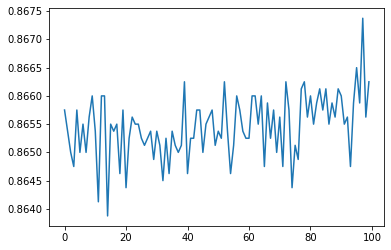

In [135]:
plt.plot(prueba_2.history['accuracy'])

Como podemos observar, desde el principio obtenemos un valor de 0.86 y durante todo el entrenamiento no obtenemos un gran aumento (fijémonos en el rango del eje y). Podemos intuir que aumentando el número de épocas, no obtengamos muchos mejores resultados ya que el modelo parece *saturar* desde el primer momento.

In [137]:
classifier_3 = classifier
prueba_3 = classifier_3.fit(X_train, y_train, epochs=300, batch_size=100, verbose=1)

Epoch 1/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8658
Epoch 2/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8652
Epoch 3/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8654
Epoch 4/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8658
Epoch 5/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8651
Epoch 6/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8655
Epoch 7/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8659
Epoch 8/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8658
Epoch 9/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8660
Epoch 10/300
80/80 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8656
Epoch 11/

In [138]:
y_pred = classifier_3.predict(X_test)
np.sum(y_test.reshape(1,-1) == np.rint(y_pred.reshape(1, -1)))/len(y_test)

0.8675

Obtenemos la misma precisión. Además, observamos la evolución de la misma durante el entrenamiento:

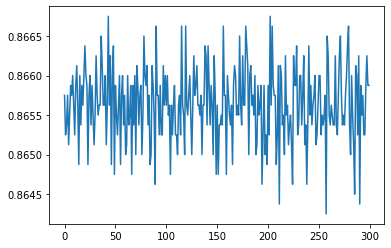

In [139]:
plt.plot(prueba_3.history['accuracy'])

Se trata de un movimiento oscilante, incluso periódico. El modelo no es capaz de obtener valores mayores de precisión. Por lo tanto, no es un fallo de las épocas elegidas o el tamaño de la tanda, sino de la arquitectura del modelo en sí. Puede que no haya suficientes unidades ocultas. 

Recogemos los resultados de las pruebas obtenidas en la siguiente tabla:

In [143]:
acc = [0.864, 0.867, 0.8675]
epochs = [100, 100, 300]
batch_size = [1, 100, 100]
data = { "Epochs" : epochs, "Batch size" : batch_size,"Accuracy" : acc}
pd.DataFrame(data)

,Epochs,Batch size,Accuracy
0,100,1,0.8640
1,100,100,0.8670
2,300,100,0.8675


Vemos que los 3 casos nos dan el mismo resultado.